<a href="https://colab.research.google.com/github/SampatPolireddi/ML_Projects/blob/main/Final_Data_Analytics_Hospitals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from numpy.core.numeric import NaN
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df=pd.read_csv("/content/merged_mentalh_commissionHub_total.csv")
xls=pd.ExcelFile("/content/drive/MyDrive/Correlation between workforce and mental health/5/csv_files/NHS_population.xlsx")
pop = pd.read_excel(xls, '2. NHSE, Org & SG - HC')
pop=pop.drop(pop.columns[[0]],axis=1)

In [ ]:
data={'Area':['london','south west','south east','midlands','east england','north west','north east and yorkshire'],
      'Area_population':[29375,12943,19051,23067,13356,18378,20642]
      }
area_pop=pd.DataFrame(data)
area_pop

,Area,Area_population
0,london,29375
1,south west,12943
2,south east,19051
3,midlands,23067
4,east england,13356
5,north west,18378
6,north east and yorkshire,20642


In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 159 columns):
 #    Column                         Dtype  
---   ------                         -----  
 0    Unnamed: 0                     int64  
 1    Org name                       object 
 2    NHSE code                      object 
 3    Specialised Commissioning Hub  object 
 4    NHSE Region name               object 
 5    Org code                       object 
 6    Cluster group_left             object 
 7    Benchmark group_left           object 
 8    Staff group_left               object 
 9    Joiners_dec_2019               float64
 10   Joiners_jan_2020               float64
 11   Joiners_feb_2020               float64
 12   Joiners_march_2020             float64
 13   Joiners_april_2020             float64
 14   Joiners_may_2020               float64
 15   Joiners_june_2020              float64
 16   Joiners_july_2020              float64
 17   Joiners_aug_2020               fl

In [ ]:
pop.head()

,Unnamed: 1,Unnamed: 2,Total,Professionally qualified clinical staff,HCHS Doctors,Consultant,Associate Specialist,Specialty Doctor,Staff Grade,Specialty Registrar,...,Support to clinical staff,"Support to doctors, nurses & midwives",Support to ambulance staff,Support to ST&T staff,NHS infrastructure support,Central functions,"Hotel, property & estates",Senior managers,Managers,Other staff or those with unknown classification
0,"Barking, Havering and Redbridge University Hos...",RF4,7421.0,4402.0,1078.0,394.0,12.0,105.0,1.0,210.0,...,2403.0,1896.0,0.0,508.0,617.0,469.0,35.0,42.0,71.0,0.0
1,"Barnet, Enfield and Haringey Mental Health NHS...",RRP,3422.0,1891.0,223.0,111.0,5.0,29.0,0.0,32.0,...,1232.0,902.0,0.0,331.0,303.0,130.0,83.0,8.0,82.0,1.0
2,Barts Health NHS Trust,R1H,17252.0,10603.0,2883.0,1128.0,23.0,74.0,2.0,1216.0,...,4185.0,3201.0,182.0,804.0,2470.0,2043.0,121.0,122.0,185.0,3.0
3,Camden and Islington NHS Foundation Trust,TAF,2299.0,923.0,160.0,78.0,0.0,15.0,0.0,26.0,...,1129.0,360.0,0.0,770.0,250.0,133.0,1.0,25.0,91.0,0.0
4,Central and North West London NHS Foundation T...,RV3,7781.0,4457.0,448.0,218.0,7.0,74.0,0.0,61.0,...,2597.0,1911.0,1.0,688.0,736.0,381.0,21.0,33.0,301.0,0.0


Adding the population of the trust to main df

In [ ]:
from numpy import NaN
temp_arr=[]
for i in range(0,len(df)):
  temp_arr.append(NaN)

df['Population']=temp_arr

df["Org name"]=df["Org name"].str.lower()
pop["Unnamed: 1"]=pop["Unnamed: 1"].str.lower()

for i in range(0,len(df)):
  for j in range(0,len(pop)):
    #print(pop["HCHS Doctors"][j])
    if df["Org name"][i]==pop["Unnamed: 1"][j]:
      df["Population"][i]=pop["HCHS Doctors"][j]
      #print(pop["HCHS Doctors"][j])
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,Unnamed: 0,Org name,NHSE code,Specialised Commissioning Hub,NHSE Region name,Org code,Cluster group_left,Benchmark group_left,Staff group_left,Joiners_dec_2019,...,MEASURE_VALUE_june21_aug21,MEASURE_VALUE_june20_aug20,MEASURE_VALUE_dec21_feb22,MEASURE_VALUE_dec20_feb21,MEASURE_VALUE_dec19_feb20,MEASURE_VALUE_sep19_nov19,MEASURE_VALUE_june19_aug19,MEASURE_VALUE_march19_may19,MEASURE_VALUE_march_may_2021,Population
0,0,"barnet, enfield and haringey mental health nhs...",Y56,LONDON COMMISSIONING HUB,London,RRP,Mental Health,Mental Health and Learning Disability,HCHS doctors (exc. junior Drs),1.5,...,13810,13705,13735,13375,13620,13385,12635,12695,15905,223.0
1,1,"barnet, enfield and haringey mental health nhs...",Y56,LONDON COMMISSIONING HUB,London,RRP,Mental Health,Mental Health and Learning Disability,HCHS doctors (exc. junior Drs),1.5,...,13810,13705,13735,13375,13620,13385,12635,12695,15905,223.0
2,2,"barnet, enfield and haringey mental health nhs...",Y56,LONDON COMMISSIONING HUB,London,RRP,Mental Health,Mental Health and Learning Disability,HCHS doctors (exc. junior Drs),1.5,...,13810,13705,13735,13375,13620,13385,12635,12695,15905,223.0
3,3,"barnet, enfield and haringey mental health nhs...",Y56,LONDON COMMISSIONING HUB,London,RRP,Mental Health,Mental Health and Learning Disability,HCHS doctors (exc. junior Drs),1.5,...,13810,13705,13735,13375,13620,13385,12635,12695,15905,223.0
4,4,"barnet, enfield and haringey mental health nhs...",Y56,LONDON COMMISSIONING HUB,London,RRP,Mental Health,Mental Health and Learning Disability,HCHS doctors (exc. junior Drs),1.5,...,13810,13705,13735,13375,13620,13385,12635,12695,15905,223.0


Data Cleaning

In [ ]:
df=df.drop(df.columns[[0,74,75,76,77,78,79,78,155,156,157]],axis=1)
df.rename(columns={'Cluster group_left':'Cluster group','Benchmark group_left':'Benchmark group','Staff group_left':'Staff group'},inplace=True)

In [ ]:
df.info(verbose=True)
#workforce  march'21 - feb '22
#referals march'21 - feb'22

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 150 columns):
 #    Column                         Dtype  
---   ------                         -----  
 0    Org name                       object 
 1    NHSE code                      object 
 2    Specialised Commissioning Hub  object 
 3    NHSE Region name               object 
 4    Org code                       object 
 5    Cluster group                  object 
 6    Benchmark group                object 
 7    Staff group_left               object 
 8    Joiners_dec_2019               float64
 9    Joiners_jan_2020               float64
 10   Joiners_feb_2020               float64
 11   Joiners_march_2020             float64
 12   Joiners_april_2020             float64
 13   Joiners_may_2020               float64
 14   Joiners_june_2020              float64
 15   Joiners_july_2020              float64
 16   Joiners_aug_2020               float64
 17   Joiners_sept_2020              fl

In [ ]:
#converting the col to lower cases
string=["Specialised Commissioning Hub","NHSE Region name","Cluster group","Benchmark group","Staff group","MEASURE_ID","MEASURE_NAME"]
for i in string:
  df[i]=df[i].str.lower()

In [ ]:
df.drop_duplicates()

,Org name,NHSE code,Specialised Commissioning Hub,NHSE Region name,Org code,Cluster group,Benchmark group,Staff group,Joiners_dec_2019,Joiners_jan_2020,...,MEASURE_VALUE_sep20_nov20,MEASURE_VALUE_sep21_nov21,MEASURE_VALUE_march20_may20,MEASURE_VALUE_june21_aug21,MEASURE_VALUE_june20_aug20,MEASURE_VALUE_dec21_feb22,MEASURE_VALUE_dec20_feb21,MEASURE_VALUE_dec19_feb20,MEASURE_VALUE_march_may_2021,Population
0,"barnet, enfield and haringey mental health nhs...",Y56,london commissioning hub,london,RRP,mental health,mental health and learning disability,hchs doctors (exc. junior drs),1.5,1.40000,...,14365,14115,11350,13810,13705,13735,13375,13620,15905,223.0
1,"barnet, enfield and haringey mental health nhs...",Y56,london commissioning hub,london,RRP,mental health,mental health and learning disability,hchs doctors (exc. junior drs),1.5,1.40000,...,14365,14115,11350,13810,13705,13735,13375,13620,15905,223.0
2,"barnet, enfield and haringey mental health nhs...",Y56,london commissioning hub,london,RRP,mental health,mental health and learning disability,hchs doctors (exc. junior drs),1.5,1.40000,...,14365,14115,11350,13810,13705,13735,13375,13620,15905,223.0
3,"barnet, enfield and haringey mental health nhs...",Y56,london commissioning hub,london,RRP,mental health,mental health and learning disability,hchs doctors (exc. junior drs),1.5,1.40000,...,14365,14115,11350,13810,13705,13735,13375,13620,15905,223.0
4,"barnet, enfield and haringey mental health nhs...",Y56,london commissioning hub,london,RRP,mental health,mental health and learning disability,hchs doctors (exc. junior drs),1.5,1.40000,...,14365,14115,11350,13810,13705,13735,13375,13620,15905,223.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,"tees, esk and wear valleys nhs foundation trust",Y63,north east and yorkshire commissioning hub,north east and yorkshire,RX3,mental health,mental health and learning disability,hchs doctors (exc. junior drs),1.7,2.72727,...,42815,44020,31375,43200,38890,45335,38690,39265,45020,348.0
459,"tees, esk and wear valleys nhs foundation trust",Y63,north east and yorkshire commissioning hub,north east and yorkshire,RX3,mental health,mental health and learning disability,hchs doctors (exc. junior drs),1.7,2.72727,...,42815,44020,31375,43200,38890,45335,38690,39265,45020,348.0
460,"tees, esk and wear valleys nhs foundation trust",Y63,north east and yorkshire commissioning hub,north east and yorkshire,RX3,mental health,mental health and learning disability,hchs doctors (exc. junior drs),1.7,2.72727,...,42815,44020,31375,43200,38890,45335,38690,39265,45020,348.0
461,"tees, esk and wear valleys nhs foundation trust",Y63,north east and yorkshire commissioning hub,north east and yorkshire,RX3,mental health,mental health and learning disability,hchs doctors (exc. junior drs),1.7,2.72727,...,42815,44020,31375,43200,38890,45335,38690,39265,45020,348.0


In [ ]:
numeric_col=[i for i in df.columns if("Joiners" in i)]
df_temp=df[numeric_col]

numeric_cols = [i for i in df.columns if ("Joiners" in i or "Leavers" in i)]

df_temp = df[numeric_cols].replace("-",NaN).astype(float)
df_temp=df_temp.fillna(df_temp.mean())#.applymap(lambda x: round(x,0))
df_temp.head()

ValueError: ignored

Data Visualization

Finding which area has most no.of referrals

In [ ]:
#Adding a new col which contains the sum of all measure values
numeric_col=[i for i in df.columns if('MEASURE_VALUE' in i)]

tdf=df[numeric_col]

tdf['Measure_val']=tdf.apply(np.sum,axis=1) #adding all the mesaure value month cols

tdf['Area']=df['NHSE region name']

temp_df=tdf.iloc[:,-2:]

area_arr=temp_df['Area'].unique()
measure_val_arr=[]

#loop which adds all measure val with same area into a single val
for j in range(0,len(area_arr)):  
  sum=0
  for i in range(0,len(temp_df)):
    if temp_df['Area'][i]==area_arr[j]:
      sum=sum+temp_df['Measure_val'][i]
  measure_val_arr.append(sum)  

data={'Area':area_arr,'Measure Value':measure_val_arr}

temp_df=pd.DataFrame(data) #re-intializing the temp df to store the val required to build our graphs
temp_df=temp_df.sort_values(by=['Measure Value'],ascending=False)
temp_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Area,Measure Value
3,midlands,712690
0,london,709930
2,south east,497045
6,north east and yorkshire,433965
5,north west,413855


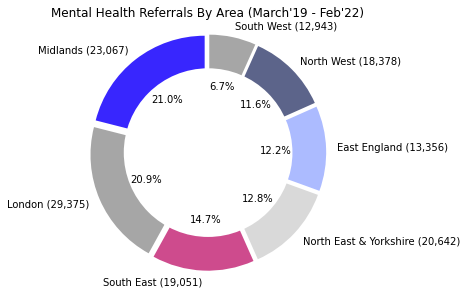

In [ ]:
# Pie chart
labels = ['Midlands (23,067)','London (29,375)','South East (19,051)','North East & Yorkshire (20,642)','East England (13,356)','North West (18,378)','South West (12,943)']

#colors
colors = ['#3826FE','#A6A6A6','#CE4B8D','#D9D9D9','#ACBBFF','#5C648A','#A6A6A6']


#explsion
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05)


plt.pie(temp_df['Measure Value'], colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.55,explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()
plt.title(str.title("Mental health referrals by area (March'19 - Feb'22)"))

plt.show()

In [ ]:
data={'Area':['Midlands','London','South East','North East & Yorkshire','East England','North West','South West'],
      'Population':[10827512,9002488,9217265,8207113,6269161,7367456,5659143]}

temp_pop=pd.DataFrame(data)
temp_pop

,Area,Population
0,Midlands,10827512
1,London,9002488
2,South East,9217265
3,North East & Yorkshire,8207113
4,East England,6269161
5,North West,7367456
6,South West,5659143


In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
import plotly.graph_objs as go


labels = ['Midlands (10,827,512)','London (9,002,488)','South East (9,217,265)','North East & Yorkshire (8,207,113)','East England (6,269,161)','North West (7,367,456)','South West (5,659,143)']

population=[10827512,9002488,9217265,8207113,6269161,7367456,5659143]
outer_values = temp_df['Measure Value']
inner_values = temp_pop['Population']


trace1 = go.Pie(
    hole=0.7,
    sort=False,
    direction='counterclockwise',
    domain={'x': [0.15, 0.85], 'y': [0.15, 0.85]},
    values=inner_values,
    labels=population,
    #textinfo='label',
    textposition='inside',
    showlegend=False,
    marker={'colors': ['#3826FE','#A6A6A6','#CE4B8D','#D9D9D9','#ACBBFF','#5C648A','#4682B4'],
        'line': {'color': 'white', 'width': 1}}
)

trace2 = go.Pie(
    hole=0.7,
    sort=False,
    direction='counterclockwise',
    values=outer_values,
    labels=labels,
    #textinfo='label',
    textposition='outside',
    marker={'colors': ['#3826FE','#A6A6A6','#CE4B8D','#D9D9D9','#ACBBFF','#5C648A','#4682B4'],
            'line': {'color': 'white', 'width': 1}}
)

fig = go.FigureWidget(data=[trace1, trace2])

fig.update_layout(
    height=500,
    width=800,
    title_text="Mental Health Referrals By Area (March'19 - Feb'22)",
    
)
fig

FigureWidget({
    'data': [{'direction': 'counterclockwise',
              'domain': {'x': [0.15, 0.85], 'y':…

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

Finding which hospital has the most referalls in midlands

In [ ]:
numeric_col=[i for i in df.columns if('MEASURE_VALUE' in i)]
tdf=df[numeric_col]
tdf['Measure_val']=tdf.apply(np.sum,axis=1)
tdf['Area']=df['NHSE region name']

area=[]
measure_val=[]
hospital=[]

for i in range(0,len(tdf)):
  if tdf['Area'][i]=='midlands':
    area.append(tdf['Area'][i])
    measure_val.append(tdf['Measure_val'][i])
    hospital.append(df['Org name'][i])

data={'Area':area,
      'Org Name':hospital,
      'Measure_val':measure_val
      }

print(numeric_col)
temp1=pd.DataFrame(data)
temp1

['MEASURE_VALUE_sep21_nov21', 'MEASURE_VALUE_june21_aug21', 'MEASURE_VALUE_dec21_feb22', 'MEASURE_VALUE_march_may_2021']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Area,Org Name,Measure_val
0,midlands,birmingham and solihull mental health nhs foun...,103295
1,midlands,coventry and warwickshire partnership nhs trust,63160
2,midlands,derbyshire healthcare nhs foundation trust,71610
3,midlands,leicestershire partnership nhs trust,92300
4,midlands,lincolnshire partnership nhs foundation trust,59075
5,midlands,midlands partnership nhs foundation trust,73500
6,midlands,north staffordshire combined healthcare nhs trust,63995
7,midlands,northamptonshire healthcare nhs foundation trust,101975
8,midlands,nottinghamshire healthcare nhs foundation trust,83780


In [ ]:
temp1=temp1.sort_values(by=['Measure_val'],ascending=False)
temp1

,Area,Org Name,Measure_val
0,midlands,birmingham and solihull mental health nhs foun...,103295
7,midlands,northamptonshire healthcare nhs foundation trust,101975
3,midlands,leicestershire partnership nhs trust,92300
8,midlands,nottinghamshire healthcare nhs foundation trust,83780
5,midlands,midlands partnership nhs foundation trust,73500
2,midlands,derbyshire healthcare nhs foundation trust,71610
6,midlands,north staffordshire combined healthcare nhs trust,63995
1,midlands,coventry and warwickshire partnership nhs trust,63160
4,midlands,lincolnshire partnership nhs foundation trust,59075


Text(0.5, 1.0, "Trusts With The Most Referrals In Midlands(March '21 - Feb '22)")

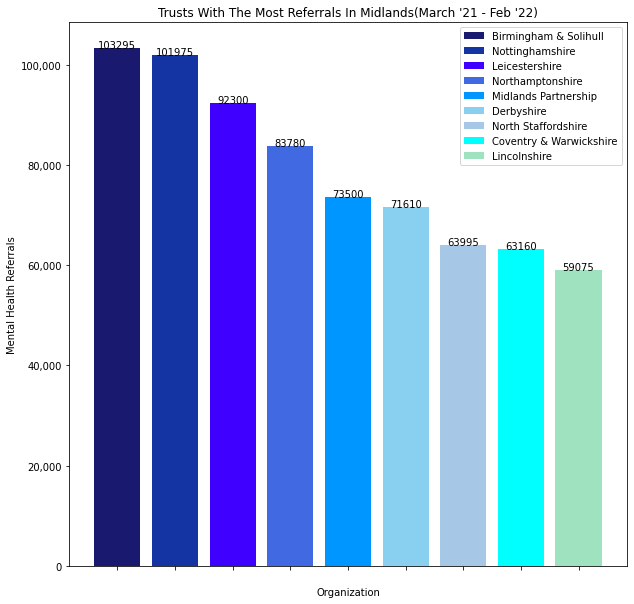

In [ ]:
import matplotlib as mpl

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i],ha = 'center')

plt.figure(figsize = (10,10))

x=[temp1['Org Name'][0],temp1['Org Name'][7],temp1['Org Name'][3],temp1['Org Name'][8],temp1['Org Name'][5],temp1['Org Name'][2],temp1['Org Name'][6],temp1['Org Name'][1],temp1['Org Name'][4]]
y=[temp1["Measure_val"][0],temp1["Measure_val"][7],temp1["Measure_val"][3],temp1["Measure_val"][8],temp1["Measure_val"][5],temp1["Measure_val"][2],temp1["Measure_val"][6],temp1["Measure_val"][1],temp1["Measure_val"][4]]



plt.bar("Birmingham & Solihull",temp1["Measure_val"][0],color='#191970',label="Birmingham & Solihull")
plt.bar("Nottinghamshire",temp1["Measure_val"][7],color='#1434A4',label='Nottinghamshire')
plt.bar("Leicestershire",temp1["Measure_val"][3],color='#3F00FF',label='Leicestershire')
plt.bar("Northamptonshire",temp1["Measure_val"][8],color='#4169E1',label='Northamptonshire')
plt.bar("Midlands Partnership",temp1["Measure_val"][5],color='#0096FF',label='Midlands Partnership')
plt.bar("Derbyshire",temp1["Measure_val"][2],color='#89CFF0',label='Derbyshire')
plt.bar("North Staffordshire",temp1["Measure_val"][6],color='#A7C7E7',label='North Staffordshire')
plt.bar("Coventry & Warwickshire",temp1["Measure_val"][1],color='#00FFFF',label='Coventry & Warwickshire')
plt.bar("Lincolnshire",temp1["Measure_val"][4],color='#9FE2BF',label='Lincolnshire')

plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))#to set commas on y-axis
addlabels(x, y)
plt.xticks(color='w')
plt.legend(loc='best')
plt.xlabel(str.title("Organization"))
plt.ylabel(str.title("Mental health referrals"))
plt.title(str.title("Trusts with the most referrals in midlands(March '21 - Feb '22)"))

Coorelation btw workforce and mental health

In [ ]:
#Intializing a df for better representation
temp=pd.DataFrame()
temp['Org name']=df['Org name']

#For measure value
numeric_col1=[i for i in df.columns if('MEASURE_VALUE' in i)]
tdf=df[numeric_col1]
temp['Measure_val']=tdf.apply(np.sum,axis=1)

#For leavers
numeric_col3=[i for i in df_temp.columns if ('Leavers' in i)]
tdf=df_temp[numeric_col3]
temp['Leavers']=tdf.apply(np.sum,axis=1)

#adding the population of respective organization
pop_arr=[]
for i in range(0,len(temp)):
  pop_arr.append(0)

temp['Population']=pop_arr
temp['Normalized_Measure_Value']=pop_arr

for i in range(0,len(temp)):
  for j in range(0,len(pop)):
    if temp['Org name'][i]==pop['Unnamed: 1'][j]:
      temp['Population'][i]=pop['HCHS Doctors'][j]
      temp['Normalized_Measure_Value'][i]=(temp['Measure_val'][i]/temp['Population'][i])

corr = temp['Normalized_Measure_Value'].corr(temp['Leavers'])
print("The correlation between Measure val and Leavers is ",corr)
#Negative correlation indicates that as leavers increase the no.of refferals decreases

temp.sort_values(by=['Leavers'],ascending=False).head()

The correlation between Measure val and Leavers is  -0.2580028002972128


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Org name,Measure_val,Leavers,Population,Normalized_Measure_Value
2,central and north west london nhs foundation t...,118520,54.000000,448,264
3,east london nhs foundation trust,136205,48.724138,423,321
6,south london and maudsley nhs foundation trust,81740,41.000000,517,158
0,"barnet, enfield and haringey mental health nhs...",57565,35.788654,223,258
35,mersey care nhs foundation trust,91890,34.322222,282,325


Text(0, 0.5, 'Mental Health Referrals (Normalized)')

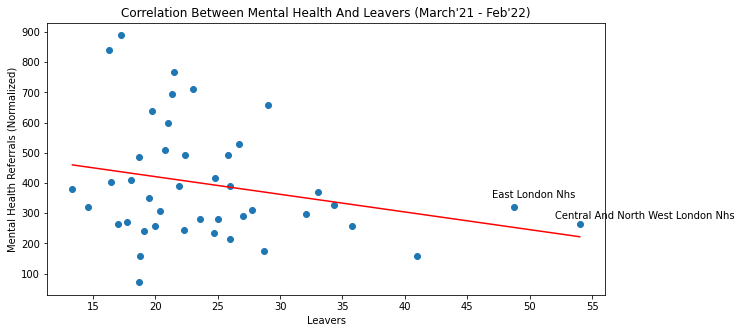

In [ ]:
plt.figure(figsize = (10,5))
# plotting the data
plt.scatter(temp['Leavers'], (temp['Measure_val']/temp['Population']))
  
#This will fit the best line into the graph
plt.plot(np.unique(temp['Leavers']), np.poly1d(np.polyfit(temp['Leavers'], (temp['Measure_val']/temp['Population']), 1))
         (np.unique(temp['Leavers'])), color='red')

plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))#to set commas on y-axis
plt.text(52,280,str.title("central and north west london nhs"))
plt.text(47,350,str.title("east london nhs"))

plt.title(str.title("Correlation Between Mental health and leavers (March'21 - Feb'22)"))
plt.xlabel("Leavers")
plt.ylabel(str.title("Mental health referrals (Normalized)"))

Correlation btw avg stability index vs measure val

In [ ]:
#Intializing a df for better representation
temp=pd.DataFrame()
temp['Org name']=df['Org name']

#For measure value
numeric_col1=[i for i in df.columns if('MEASURE_VALUE' in i)]
tdf=df[numeric_col1]
temp['Measure_val']=tdf.apply(np.sum,axis=1)

#For Avg stability index
numeric_col4=[i for i in df.columns if ('Stability' in i)]
tdf=df[numeric_col4]
tdf=tdf.replace('%','',regex=True).astype(float)
tdf['Avg_Stability_index']=tdf.apply(np.sum,axis=1)
tdf['Avg_Stability_index']=tdf['Avg_Stability_index']/len(numeric_col4) #taking avg percent as original data was in perecents
temp['Avg_Stability_Index']=tdf['Avg_Stability_index'] #Adding this to main df #dont Delete this

#adding the population of respective organization
pop_arr=[]
for i in range(0,len(temp)):
  pop_arr.append(0)

temp['Population']=pop_arr
temp['Normalized_Measure_Value']=pop_arr

for i in range(0,len(temp)):
  for j in range(0,len(pop)):
    if temp['Org name'][i]==pop['Unnamed: 1'][j]:
      temp['Population'][i]=pop['HCHS Doctors'][j]
      temp['Normalized_Measure_Value'][i]=(temp['Measure_val'][i]/temp['Population'][i])

corr = temp['Normalized_Measure_Value'].corr(temp['Avg_Stability_Index'])
print("The correlation between  Normalized Measure val and Average Stability index is ",corr)

temp.sort_values(by=['Avg_Stability_Index'],ascending=False).head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



The correlation between  Normalized Measure val and Average Stability index is  0.1511705407512492


,Org name,Measure_val,Avg_Stability_Index,Population,Normalized_Measure_Value
30,essex partnership university nhs foundation trust,97995,99.375000,257,381
27,northamptonshire healthcare nhs foundation trust,101975,99.266667,133,766
42,"tees, esk and wear valleys nhs foundation trust",177575,99.208333,348,510
21,coventry and warwickshire partnership nhs trust,63160,99.158333,180,350
25,midlands partnership nhs foundation trust,73500,99.100000,239,307


Text(97.85, 550, 'Humber Teaching Nhs')

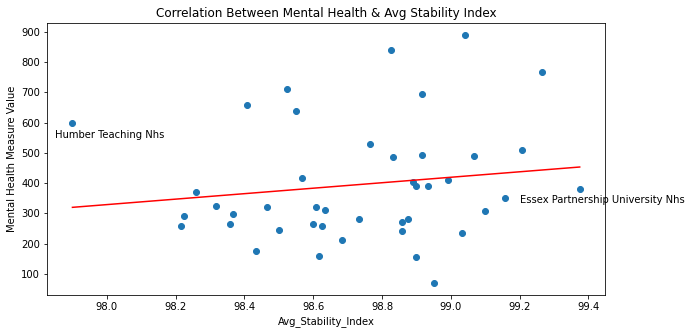

In [ ]:
#Graph
plt.figure(figsize = (10,5))
plt.scatter(temp['Avg_Stability_Index'], temp['Normalized_Measure_Value'])
  
# This will fit the best line into the graph
plt.plot(np.unique(temp['Avg_Stability_Index']), np.poly1d(np.polyfit(temp['Avg_Stability_Index'], temp['Normalized_Measure_Value'], 1))
         (np.unique(temp['Avg_Stability_Index'])), color='red')

plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))#to set commas on y-axis
plt.title(str.title('Correlation between mental health & avg stability index'))
plt.xlabel("Avg_Stability_Index")
plt.ylabel(str.title("Mental Health Measure Value"))

#text for the org name in graph
plt.text(99.2,334,str.title("essex partnership university nhs"))
plt.text(97.85,550,str.title("humber teaching nhs"))

Joiners vs leavers based on area(2021)

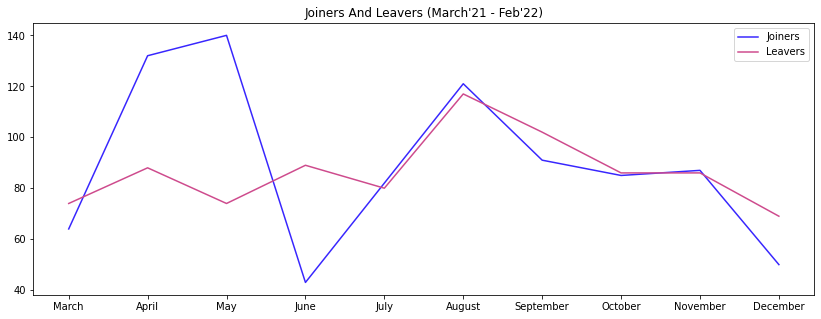

In [ ]:
#For joiners
numeric_col1=[i for i in df_temp.columns if('Joiners' in i and 'Q' not in i and '2021' in i)]
tdf=df_temp[numeric_col1]
sum_joiners_arr=[] #arr to store the individual sum of all the months

for i in tdf.columns:
  sum=tdf[i].sum()
  sum_joiners_arr.append(sum)

#For leavers
numeric_col2=[i for i in df_temp.columns if('Leavers' in i and 'Q' not in i and '2021' in i)]
tdf=df_temp[numeric_col2]
sum_leavers_arr=[] #arr to store the individual sum of all the months

for i in tdf.columns:
  sum=tdf[i].sum()
  sum_leavers_arr.append(sum)

#creating a new df by merging the abv sum_arrays we got for joiners and leavers respectively
data = {'Months': ['March','April','May','June','July','August','September','October','November','December'], #Note: Dint include Jan as we dont hv the data for jan 2021
        'Joiners':sum_joiners_arr,
        'Leavers':sum_leavers_arr
        }

df_temp1 = pd.DataFrame(data)
df_temp1=df_temp1.round()

color1='#3826FE'#Joiner color
color2='#CE4B8D' #Leaver color

plt.figure(figsize = (14,5))
x=df_temp1['Months']

plt.plot(df_temp1['Months'],df_temp1['Joiners'],label='Joiners',color=color1)
plt.plot(df_temp1['Months'],df_temp1['Leavers'],label='Leavers',color=color2)
plt.title(str.title("Joiners and leavers (March'21 - Feb'22)"))
plt.legend()
plt.show()

AREA vs No.of joiners 

In [ ]:
#Q1
df["Joiners_MM_2021"]=df_temp['Joiners_march_2021']+df_temp['Joiners_april_2021']
df["Joiners_MM_2021"]=df_temp['Joiners_may_2021']+df["Joiners_MM_2021"]

#JUNE-AUG
df["Joiners_JA_2021"]=df_temp['Joiners_june_2021']+df_temp['Joiners_july_2021']
df["Joiners_JA_2021"]=df_temp['Joiners_aug_2021']+df["Joiners_JA_2021"]

#SEPT-NOV
df["Joiners_SN_2021"]=df_temp['Joiners_sept_2021']+df_temp['Joiners_oct_2021']
df["Joiners_SN_2021"]=df_temp['Joiners_nov_2021']+df["Joiners_SN_2021"]

#DEC-FEB
df["Joiners_DF_2021"]=df_temp['Joiners_dec_2021']+df_temp["Joiners_jan_2022"]
df["Joiners_DF_2021"]=df_temp["Joiners_feb_2022"]+df["Joiners_DF_2021"]

#Finding the sum of each Q
s1=df['Joiners_MM_2021'].sum()
s2=df['Joiners_JA_2021'].sum()
s3=df['Joiners_SN_2021'].sum()
s4=df['Joiners_DF_2021'].sum()

print(s1,s2,s3,s4)

q1_london=0
q1_midlands=0
q1_southeast=0
q1_ney=0
q1_southwest=0
q1_eoe=0
q1_northwest=0

q2_london=0
q2_midlands=0
q2_southeast=0
q2_ney=0
q2_southwest=0
q2_eoe=0
q2_northwest=0


q3_london=0
q3_midlands=0
q3_southeast=0
q3_ney=0
q3_southwest=0
q3_eoe=0
q3_northwest=0

q4_london=0
q4_midlands=0
q4_southeast=0
q4_ney=0
q4_southwest=0
q4_eoe=0
q4_northwest=0


for i in range(0,len(df['NHSE region name'])):
  if df['NHSE region name'][i]=='london':
    q1_london=q1_london+df['Joiners_MM_2021'][i]
    q2_london=q2_london+df['Joiners_JA_2021'][i]
    q3_london=q3_london+df['Joiners_SN_2021'][i]
    q4_london=q4_london+df['Joiners_DF_2021'][i]
  elif df['NHSE region name'][i]=='midlands':
    q1_midlands=q1_midlands+df['Joiners_MM_2021'][i]
    q2_midlands=q2_midlands+df['Joiners_JA_2021'][i]
    q3_midlands=q3_midlands+df['Joiners_SN_2021'][i]
    q4_midlands=q4_midlands+df['Joiners_DF_2021'][i]
  elif df['NHSE region name'][i]=='south east':
    q1_southeast=q1_southeast+df['Joiners_MM_2021'][i]
    q2_southeast=q2_southeast+df['Joiners_JA_2021'][i]
    q3_southeast=q3_southeast+df['Joiners_SN_2021'][i]
    q4_southeast=q4_southeast+df['Joiners_DF_2021'][i]
  elif df['NHSE region name'][i]=='north east and yorkshire':
    q1_ney=q1_ney+df['Joiners_MM_2021'][i]
    q2_ney=q2_ney+df['Joiners_JA_2021'][i]
    q3_ney=q3_ney+df['Joiners_SN_2021'][i]
    q4_ney=q4_ney+df['Joiners_DF_2021'][i]
  elif df['NHSE region name'][i]=='south west':
    q1_southwest=q1_southwest+df['Joiners_MM_2021'][i]
    q2_southwest=q2_southwest+df['Joiners_JA_2021'][i]
    q3_southwest=q3_southwest+df['Joiners_SN_2021'][i]
    q4_southwest=q4_southwest+df['Joiners_DF_2021'][i]
  elif df['NHSE region name'][i]=='east of england':
    q1_eoe=q1_eoe+df['Joiners_MM_2021'][i]
    q2_eoe=q2_eoe+df['Joiners_JA_2021'][i]
    q3_eoe=q3_eoe+df['Joiners_SN_2021'][i]
    q4_eoe=q4_eoe+df['Joiners_DF_2021'][i]
  elif df['NHSE region name'][i]=='north west':
    q1_northwest=q1_northwest+df['Joiners_MM_2021'][i]
    q2_northwest=q2_northwest+df['Joiners_JA_2021'][i]
    q3_northwest=q3_northwest+df['Joiners_SN_2021'][i]
    q4_northwest=q4_northwest+df['Joiners_DF_2021'][i]

data = {'Area': ['London', 'Midlands', 'South East', 'North East & Yorkshire','South West','EastEngland','North West'],
        'MM_joiners': [q1_london,q1_midlands,q1_southeast,q1_ney,q1_southwest,q1_eoe,q1_northwest],
        'JA_joiners': [q2_london,q2_midlands,q2_southeast,q2_ney,q1_southwest,q2_eoe,q2_northwest],
        'SN_joiners': [q3_london,q3_midlands,q3_southeast,q3_ney,q1_southwest,q3_eoe,q3_northwest],
        'DF_joiners': [q4_london,q4_midlands,q4_southeast,q4_ney,q1_southwest,q4_eoe,q4_northwest]}

df_temp1 = pd.DataFrame(data)

df_temp1.head()
df_temp1['Total']=df_temp1['MM_joiners']+df_temp1['JA_joiners']+df_temp1['SN_joiners']+df_temp1['DF_joiners']
df_temp1=df_temp1.round()
df_temp1['Total'].sum()

336.65654648956354 245.56486486486486 262.4901233030265 220.22828784119108


1067.0

In [ ]:
df_temp1=df_temp1.sort_values(by=['Total'],ascending=True)
df_temp1

,Area,MM_joiners,JA_joiners,SN_joiners,DF_joiners,Total
5,EastEngland,16.0,23.0,22.0,21.0,83.0
4,South West,21.0,21.0,21.0,21.0,85.0
3,North East & Yorkshire,28.0,32.0,29.0,25.0,114.0
2,South East,36.0,30.0,37.0,30.0,133.0
6,North West,119.0,18.0,27.0,21.0,185.0
1,Midlands,58.0,44.0,48.0,48.0,198.0
0,London,58.0,83.0,77.0,52.0,269.0


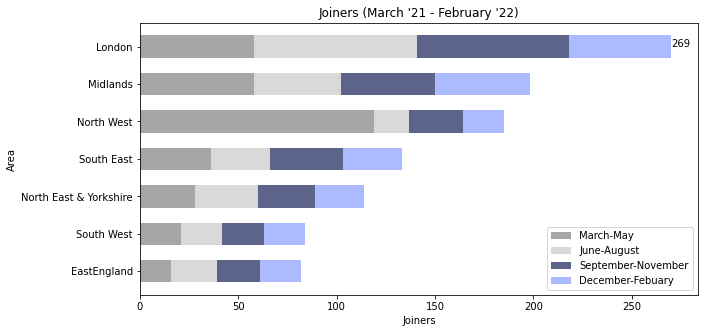

In [ ]:
plt.figure(figsize = (10,5))

w = 0.6

ax=plt.barh(df_temp1['Area'], df_temp1['MM_joiners'], w,color='#A6A6A6')
plt.barh(df_temp1['Area'], df_temp1['JA_joiners'],w,left=df_temp1['MM_joiners'], color='#D9D9D9')
plt.barh(df_temp1['Area'], df_temp1['SN_joiners'],w,left=df_temp1['MM_joiners']+df_temp1['JA_joiners'], color='#5C648A')
plt.barh(df_temp1['Area'], df_temp1['DF_joiners'],w,left=df_temp1['MM_joiners']+df_temp1['JA_joiners']+df_temp1['SN_joiners'], color='#ACBBFF')

plt.legend(['March-May','June-August','September-November','December-Febuary'])
plt.ylabel('Area')
plt.xlabel('Joiners')
plt.text(275,6,str.title("269"),ha='center')
plt.title(str.title("Joiners (March '21 - february '22)"))
plt.show()

Leavers vs Area

In [ ]:
#March-May
df["Leavers_MM_2021"]=df_temp['Leavers_march_2021']+df_temp['Leavers_april_2021']
df["Leavers_MM_2021"]=df_temp['Leavers_may_2021']+df["Leavers_MM_2021"] #Adding 2022 jan month as we dont have jan 2021 data

#June-August
df["Leavers_JA_2021"]=df_temp['Leavers_june_2021']+df_temp['Leavers_july_2021']
df["Leavers_JA_2021"]=df_temp['Leavers_aug_2021'] +df["Leavers_JA_2021"]

#Sept-Nov
df["Leavers_SN_2021"]=df_temp['Leavers_sept_2021']+df_temp['Leavers_oct_2021']
df["Leavers_SN_2021"]=+df_temp['Leavers_nov_2021']+df["Leavers_SN_2021"]

#Dec-Feb
df["Leavers_DF_2021"]=df_temp['Leavers_dec_2021']+df_temp['Leavers_jan_2022']
df["Leavers_DF_2021"]=df_temp['Leavers_feb_2022']+df["Leavers_DF_2021"]

#Finding the sum of each Q
s1=df['Leavers_MM_2021'].sum()
s2=df['Leavers_JA_2021'].sum()
s3=df['Leavers_SN_2021'].sum()
s4=df['Leavers_DF_2021'].sum()



q1_london=0
q1_midlands=0
q1_southeast=0
q1_ney=0
q1_southwest=0
q1_eoe=0
q1_northwest=0

q2_london=0
q2_midlands=0
q2_southeast=0
q2_ney=0
q2_southwest=0
q2_eoe=0
q2_northwest=0


q3_london=0
q3_midlands=0
q3_southeast=0
q3_ney=0
q3_southwest=0
q3_eoe=0
q3_northwest=0

q4_london=0
q4_midlands=0
q4_southeast=0
q4_ney=0
q4_southwest=0
q4_eoe=0
q4_northwest=0


for i in range(0,len(df['NHSE region name'])):
  if df['NHSE region name'][i]=='london':
    q1_london=q1_london+df['Leavers_MM_2021'][i]
    q2_london=q2_london+df['Leavers_JA_2021'][i]
    q3_london=q3_london+df['Leavers_SN_2021'][i]
    q4_london=q4_london+df['Leavers_DF_2021'][i]
  elif df['NHSE region name'][i]=='midlands':
    q1_midlands=q1_midlands+df['Leavers_MM_2021'][i]
    q2_midlands=q2_midlands+df['Leavers_JA_2021'][i]
    q3_midlands=q3_midlands+df['Leavers_SN_2021'][i]
    q4_midlands=q4_midlands+df['Leavers_DF_2021'][i]
  elif df['NHSE region name'][i]=='south east':
    q1_southeast=q1_southeast+df['Leavers_MM_2021'][i]
    q2_southeast=q2_southeast+df['Leavers_JA_2021'][i]
    q3_southeast=q3_southeast+df['Leavers_SN_2021'][i]
    q4_southeast=q4_southeast+df['Leavers_DF_2021'][i]
  elif df['NHSE region name'][i]=='north east and yorkshire':
    q1_ney=q1_ney+df['Leavers_MM_2021'][i]
    q2_ney=q2_ney+df['Leavers_JA_2021'][i]
    q3_ney=q3_ney+df['Leavers_SN_2021'][i]
    q4_ney=q4_ney+df['Leavers_DF_2021'][i]
  elif df['NHSE region name'][i]=='south west':
    q1_southwest=q1_southwest+df['Leavers_MM_2021'][i]
    q2_southwest=q2_southwest+df['Leavers_JA_2021'][i]
    q3_southwest=q3_southwest+df['Leavers_SN_2021'][i]
    q4_southwest=q4_southwest+df['Leavers_DF_2021'][i]
  elif df['NHSE region name'][i]=='east of england':
    q1_eoe=q1_eoe+df['Leavers_MM_2021'][i]
    q2_eoe=q2_eoe+df['Leavers_JA_2021'][i]
    q3_eoe=q3_eoe+df['Leavers_SN_2021'][i]
    q4_eoe=q4_eoe+df['Leavers_DF_2021'][i]
  elif df['NHSE region name'][i]=='north west':
    q1_northwest=q1_northwest+df['Leavers_MM_2021'][i]
    q2_northwest=q2_northwest+df['Leavers_JA_2021'][i]
    q3_northwest=q3_northwest+df['Leavers_SN_2021'][i]
    q4_northwest=q4_northwest+df['Leavers_DF_2021'][i]

data = {'Area': ['London', 'Midlands', 'South East', 'North East & Yorkshire','South West','EastEngland','North West'],
        'MM_Leavers': [q1_london,q1_midlands,q1_southeast,q1_ney,q1_southwest,q1_eoe,q1_northwest],
        'JA_Leavers': [q2_london,q2_midlands,q2_southeast,q2_ney,q1_southwest,q2_eoe,q2_northwest],
        'SN_Leavers': [q3_london,q3_midlands,q3_southeast,q3_ney,q1_southwest,q3_eoe,q3_northwest],
        'DF_Leavers': [q4_london,q4_midlands,q4_southeast,q4_ney,q1_southwest,q4_eoe,q4_northwest]}

df_temp2 = pd.DataFrame(data)

df_temp2.head()
df_temp2['Total']=df_temp2['MM_Leavers']+df_temp2['JA_Leavers']+df_temp2['SN_Leavers']+df_temp2['DF_Leavers']
df_temp2=df_temp2.round()
df_temp2['Total'].sum()

1054.0

In [ ]:
df_temp2=df_temp2.sort_values(by=['Total'],ascending=True)
df_temp2

,Area,MM_Leavers,JA_Leavers,SN_Leavers,DF_Leavers,Total
4,South West,18.0,18.0,18.0,18.0,72.0
5,EastEngland,22.0,26.0,24.0,27.0,99.0
6,North West,23.0,24.0,30.0,23.0,100.0
3,North East & Yorkshire,22.0,37.0,32.0,30.0,121.0
2,South East,33.0,36.0,38.0,36.0,143.0
1,Midlands,47.0,57.0,47.0,51.0,201.0
0,London,72.0,89.0,83.0,74.0,318.0


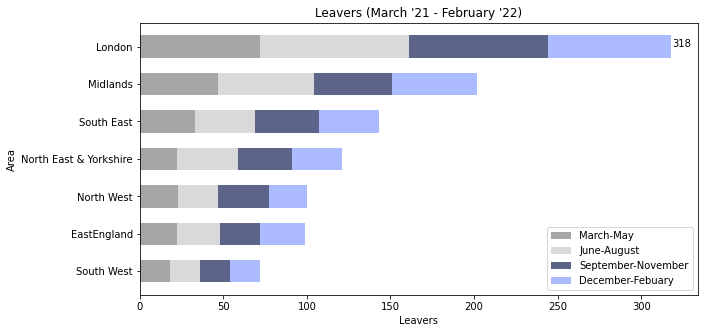

In [ ]:
plt.figure(figsize = (10,5))

w = 0.6

plt.barh(df_temp2['Area'], df_temp2['MM_Leavers'], w,color='#A6A6A6')
plt.barh(df_temp2['Area'], df_temp2['JA_Leavers'],w,left=df_temp2['MM_Leavers'], color='#D9D9D9')
plt.barh(df_temp2['Area'], df_temp2['SN_Leavers'],w,left=df_temp2['MM_Leavers']+df_temp2['JA_Leavers'], color='#5C648A')
plt.barh(df_temp2['Area'], df_temp2['DF_Leavers'],w,left=df_temp2['MM_Leavers']+df_temp2['JA_Leavers']+df_temp2['SN_Leavers'], color='#ACBBFF')

plt.legend(['March-May','June-August','September-November','December-Febuary'])
plt.ylabel('Area')
plt.xlabel('Leavers')
plt.text(324,6,str.title("318"),ha='center')
plt.title(str.title("leavers (March '21 - february '22)"))
plt.show()

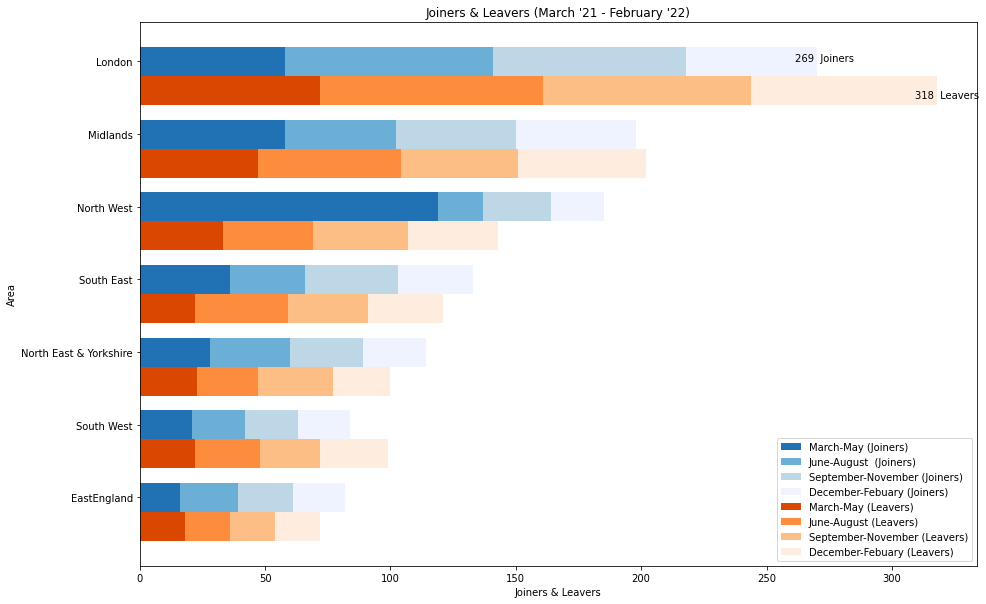

In [ ]:
plt.figure(figsize = (15,10))

x1_axis = np.arange(len(df_temp1['Area']))
x2_axis = np.arange(len(df_temp2['Area']))

w=0.4

ax=plt.barh(df_temp1['Area'], df_temp1['MM_joiners'], w,color='#2171b5')   
plt.barh(df_temp1['Area'], df_temp1['JA_joiners'],w,left=df_temp1['MM_joiners'], color='#6baed6')
plt.barh(df_temp1['Area'], df_temp1['SN_joiners'],w,left=df_temp1['MM_joiners']+df_temp1['JA_joiners'], color='#bdd7e7')
plt.barh(df_temp1['Area'], df_temp1['DF_joiners'],w,left=df_temp1['MM_joiners']+df_temp1['JA_joiners']+df_temp1['SN_joiners'], color='#eff3ff')

plt.barh(x2_axis-0.4, df_temp2['MM_Leavers'], w,color='#d94701')
plt.barh(x2_axis-0.4,df_temp2['JA_Leavers'],w,left=df_temp2['MM_Leavers'], color='#fd8d3c')
plt.barh(x2_axis-0.4, df_temp2['SN_Leavers'],w,left=df_temp2['MM_Leavers']+df_temp2['JA_Leavers'], color='#fdbe85')
plt.barh(x2_axis-0.4, df_temp2['DF_Leavers'],w,left=df_temp2['MM_Leavers']+df_temp2['JA_Leavers']+df_temp2['SN_Leavers'], color='#feedde',label='pink')

plt.legend(['March-May (Joiners)','June-August  (Joiners)','September-November (Joiners)','December-Febuary (Joiners)','March-May (Leavers)','June-August (Leavers)','September-November (Leavers)','December-Febuary (Leavers)'])

#For displaying the val of london
plt.text(273,6,str.title("269  Joiners"),ha='center')
plt.text(322,5.5,str.title("318  Leavers"),ha='center')

plt.ylabel('Area')
plt.xlabel('Joiners & Leavers')
plt.title(str.title("Joiners & leavers (March '21 - February '22)"))
plt.show()

Hospitals which are contributing the biggest numbers for mental health referrals totally

In [ ]:
colors=['#3826FE','#A6A6A6','#CE4B8D','#D9D9D9','#ACBBFF','#ACBBFF','#A6A6A6','#5C648A','#ACBBFF','#FF0000']
hosp_names=['Tees, Esk and Wear Valleys','Greater Manchester','Norfolk and Suffolk','East London','Kent and Medway','North East London','Central & North West London','Pennine Care','Sussex Partnership','Birmingham &Solihull']
data={'Hospitals':df['Org name'],
      'Area':df['NHSE region name'],
      'Avg Stability Index':df['Avg_Stability_Index'],
      'Total Measure Value':df['Total_Measure_Val']
      }

tdf=pd.DataFrame(data)

temp=tdf.sort_values(by=['Total Measure Value'],ascending=False)
temp1=temp.head(10)
temp1['Hospital_name_small']=hosp_names
temp1['Colors']=colors

temp1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Hospitals,Area,Avg Stability Index,Total Measure Value,Hospital_name_small,Colors
42,"tees, esk and wear valleys nhs foundation trust",north east and yorkshire,99.208333,177575,"Tees, Esk and Wear Valleys",#3826FE
34,greater manchester mental health nhs foundatio...,north west,98.766667,168215,Greater Manchester,#A6A6A6
32,norfolk and suffolk nhs foundation trust,east of england,98.408333,144505,Norfolk and Suffolk,#CE4B8D
3,east london nhs foundation trust,london,98.466667,136205,East London,#D9D9D9
15,kent and medway nhs and social care partnershi...,south east,98.525000,126485,Kent and Medway,#ACBBFF
4,north east london nhs foundation trust,london,99.066667,123945,North East London,#ACBBFF
2,central and north west london nhs foundation t...,london,98.358333,118520,Central & North West London,#A6A6A6
36,pennine care nhs foundation trust,north west,98.550000,112230,Pennine Care,#5C648A
19,sussex partnership nhs foundation trust,south east,98.900000,110425,Sussex Partnership,#ACBBFF
20,birmingham and solihull mental health nhs foun...,midlands,98.258333,103295,Birmingham &Solihull,#FF0000


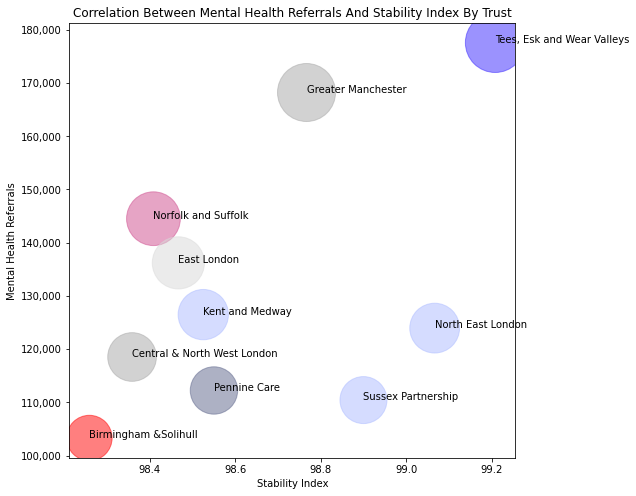

In [ ]:
import matplotlib.patches as mpatches
plt.figure(figsize = (8,8))
plt.scatter(x=temp1['Avg Stability Index'],
            y=temp1['Total Measure Value'],
            alpha=0.5,
            s=temp1['Total Measure Value']/50,
            c=temp1['Colors'])

plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))#to set commas on y-axis
#labels
x=temp1['Avg Stability Index']
y=temp1['Total Measure Value']
for i,txt in enumerate(temp1['Hospital_name_small']):
  plt.annotate(txt,(x.iloc[i], y.iloc[i]))
  #print(i,txt,x.iloc[i],y.iloc[i],temp1['Total Measure Value'].iloc[i])

plt.xlabel(str.title('Stability Index'))
plt.ylabel(str.title("Mental health referrals"))
plt.title(str.title("Correlation between Mental health referrals and stability index by trust"))
plt.show()